 <h1>IMPACT OF SOCIAL DISTANCING & MOBILITY REDUCTION POLICY (During COVID-19)</h1>

This analysis includes basic descriptive statistsics, trends over time and the mobility reductions.
Before diving into the analysis, I first had to load the files, combine the tables into one table to make work easier and then check for missing values before performing any analysis.

In [1]:
import pandas as pd

# Loading each CSV file
df1 = pd.read_csv('day1_0000.csv')
df2 = pd.read_csv('day1_0800.csv')
df3 = pd.read_csv('day1_1600.csv')

df4 = pd.read_csv('day2_0000.csv')
df5 = pd.read_csv('day2_0800.csv')
df6 = pd.read_csv('day2_1600.csv')

df7 = pd.read_csv('day3_0000.csv')
df8 = pd.read_csv('day3_0800.csv')
df9 = pd.read_csv('day3_1600.csv')

df1 = pd.read_csv('day4_0000.csv')
df2 = pd.read_csv('day4_0800.csv')
df3 = pd.read_csv('day4_1600.csv')

df4 = pd.read_csv('day5_0000.csv')
df5 = pd.read_csv('day5_0800.csv')
df6 = pd.read_csv('day5_1600.csv')

df7 = pd.read_csv('day6_0000.csv')
df8 = pd.read_csv('day6_0800.csv')
df9 = pd.read_csv('day6_1600.csv')

df1 = pd.read_csv('day7_0000.csv')
df2 = pd.read_csv('day7_0800.csv')
df3 = pd.read_csv('day7_1600.csv')

<ipython-input-1-fdd69665abf0>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
dataframes = [df1, df2, df3, df4, df5, df6, df7, df8, df9]

# Combining into a single DataFrame
combined_data = pd.concat(dataframes, ignore_index=True)

print(combined_data.head())


   Unnamed: 0  index  Baseline: People Moving  Crisis: People Moving  \
0           0   4399                14.666667                     35   
1           1   4401                12.000000                     19   
2           2   4438                10.333333                     20   
3           3   4439                13.000000                     18   
4           4   4440                11.000000                     11   

          x0        y0         x1        y1  
0  62.788086  8.425543  62.963867  8.425543  
1  62.788086  8.425543  63.315430  8.172468  
2  62.788086  9.434505  62.963867  9.350634  
3  62.788086  9.434505  63.139650  9.350634  
4  62.788086  9.434505  63.227540  9.685890  


In [3]:
# Checking for missing values
print(combined_data.isnull().sum())


Unnamed: 0                 0
index                      0
Baseline: People Moving    0
Crisis: People Moving      0
x0                         0
y0                         0
x1                         0
y1                         0
dtype: int64


In [4]:
# Grouping by the index (time period)
time_summary = combined_data.groupby('index').agg({
    'Baseline: People Moving': 'sum',
    'Crisis: People Moving': 'sum'
}).reset_index()

# Calculating the percentage of mobility reductions
time_summary['Reduction (%)'] = ((time_summary['Baseline: People Moving'] - time_summary['Crisis: People Moving']) / time_summary['Baseline: People Moving']) * 100

print(time_summary)


      index  Baseline: People Moving  Crisis: People Moving  Reduction (%)
0      2040                15.666667                     28     -78.723404
1      2041                11.000000                     11       0.000000
2      2073                11.000000                     20     -81.818182
3      2074                10.333333                     10       3.225806
4      2075                12.000000                     10      16.666667
...     ...                      ...                    ...            ...
4469  12288                17.666667                     51    -188.679245
4470  12289                15.666667                     56    -257.446809
4471  12290                28.666667                    123    -329.069767
4472  12291                67.800000                    216    -218.584071
4473  12292                16.666667                     58    -248.000000

[4474 rows x 4 columns]


 <h2>GENERAL ANALYSIS OF THE DATA</h2>

The general analysis of the data included performing descriptive analysis, calculating mobility reduction, adding a reduction column(to show the percentage reduction in movement), getting the aggregate movements for baseline and crisis period, comparing the two and performing time-series trend analysis.

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5589 entries, 0 to 5588
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               5589 non-null   int64  
 1   index                    5589 non-null   int64  
 2   Baseline: People Moving  5589 non-null   float64
 3   Crisis: People Moving    5589 non-null   int64  
 4   x0                       5589 non-null   float64
 5   y0                       5589 non-null   float64
 6   x1                       5589 non-null   float64
 7   y1                       5589 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 349.4 KB
None

Descriptive Statistics:
        Unnamed: 0         index  Baseline: People Moving  \
count  5589.000000   5589.000000              5589.000000   
mean    360.892467   7652.983360                28.077737   
std     247.782937   2569.141708                42.715678   
min       0.00

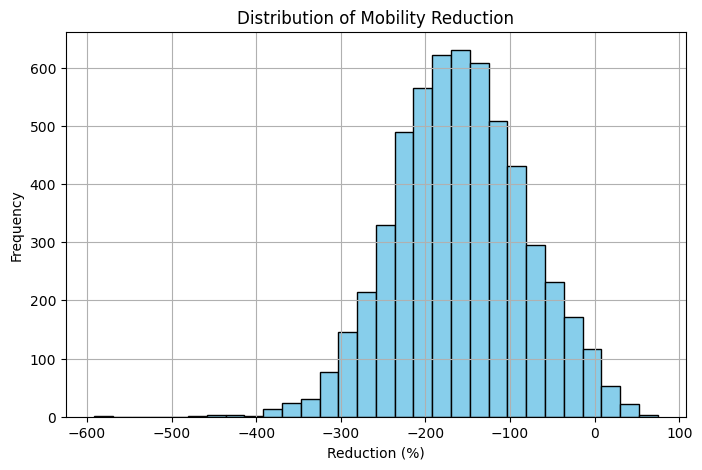

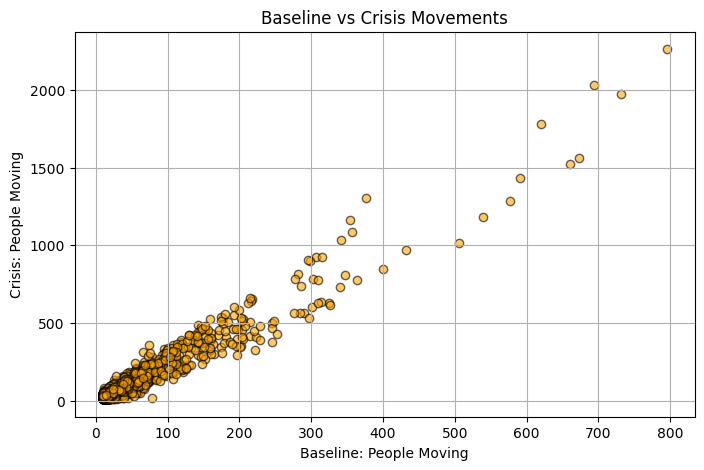

In [5]:
import matplotlib.pyplot as plt

print("Dataset Info:")
print(combined_data.info())
print("\nDescriptive Statistics:")
print(combined_data.describe())

# Calculating the mobility reduction
combined_data['Reduction (%)'] = ((combined_data['Baseline: People Moving'] - combined_data['Crisis: People Moving']) / combined_data['Baseline: People Moving']) * 100

# Overall Reduction
overall_reduction = combined_data['Reduction (%)'].mean()
print(f"\nOverall Mobility Reduction: {overall_reduction:.2f}%")

# Total Baseline and Crisis Movements
total_baseline = combined_data['Baseline: People Moving'].sum()
total_crisis = combined_data['Crisis: People Moving'].sum()
print(f"\nTotal Movement Before Crisis: {total_baseline}")
print(f"Total Movement During Crisis: {total_crisis}")
print(f"Percentage Reduction in Movement: {(total_baseline - total_crisis) / total_baseline * 100:.2f}%")

# Reduction distribution
plt.figure(figsize=(8, 5))
plt.hist(combined_data['Reduction (%)'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Mobility Reduction')
plt.xlabel('Reduction (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Comparing Baseline vs Crisis Movements
plt.figure(figsize=(8, 5))
plt.scatter(combined_data['Baseline: People Moving'], combined_data['Crisis: People Moving'], alpha=0.6, color='orange', edgecolor='k')
plt.title('Baseline vs Crisis Movements')
plt.xlabel('Baseline: People Moving')
plt.ylabel('Crisis: People Moving')
plt.grid(True)
plt.show()

# Time-series trend analysis
if 'filename' in combined_data.columns:
    combined_data['Period'] = combined_data['filename'].str.extract(r'day\d+_(\d{4})')[0]  # To extract the time period (0000, 0800, 1600)
    combined_data['Day'] = combined_data['filename'].str.extract(r'day(\d+)_')[0]  # the day number
    combined_data['Day'] = pd.to_numeric(combined_data['Day'])
    combined_data['Period'] = pd.to_numeric(combined_data['Period'])

    # Grouping by day and period for trend analysis
    mobility_trend = combined_data.groupby(['Day', 'Period'])[['Baseline: People Moving', 'Crisis: People Moving']].sum().reset_index()

    # Plot mobility trend
    plt.figure(figsize=(10, 6))
    for label, color in zip(['Baseline: People Moving', 'Crisis: People Moving'], ['blue', 'red']):
        plt.plot(
            mobility_trend['Day'] + mobility_trend['Period'] / 2400,
            mobility_trend[label],
            label=label,
            color=color
        )
    plt.title('Mobility Trends Over Time')
    plt.xlabel('Day and Period')
    plt.ylabel('Number of People Moving')
    plt.legend()
    plt.grid(True)
    plt.show()


 <h3>1. Changes Over Time</h3>

To analyze changes over time, we need to examine trends in the movements across days and periods of the day. This was achieved by assigning days and periods, grouping and aggregating the movements and finally visualizing.

In [6]:
num_days = 7  # Number of days in the dataset
periods_per_day = 3  # the three periods per day (0000, 0800, 1600)
records_per_file = len(combined_data) // (num_days * periods_per_day)  # Assuming evenly distributed data

# Creating Day and Period columns
combined_data['Day'] = (combined_data.index // (records_per_file * periods_per_day)) + 1  # Assign Day (1 to 7)
combined_data['Period'] = ((combined_data.index // records_per_file) % periods_per_day)  # Assign Period (0, 1, 2)

# Mapping Period to Time Range
period_mapping = {0: '0000-0800', 1: '0800-1600', 2: '1600-0000'}
combined_data['Time Range'] = combined_data['Period'].map(period_mapping)

# Verifying the structure
print(combined_data[['Day', 'Period', 'Time Range']])


      Day  Period Time Range
0       1       0  0000-0800
1       1       0  0000-0800
2       1       0  0000-0800
3       1       0  0000-0800
4       1       0  0000-0800
...   ...     ...        ...
5584    7       2  1600-0000
5585    7       2  1600-0000
5586    8       0  0000-0800
5587    8       0  0000-0800
5588    8       0  0000-0800

[5589 rows x 3 columns]


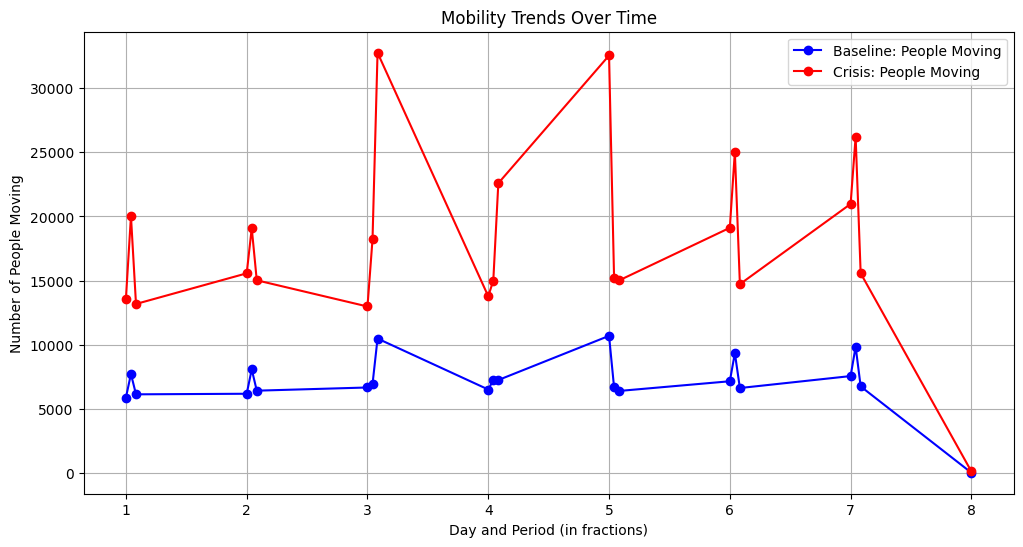

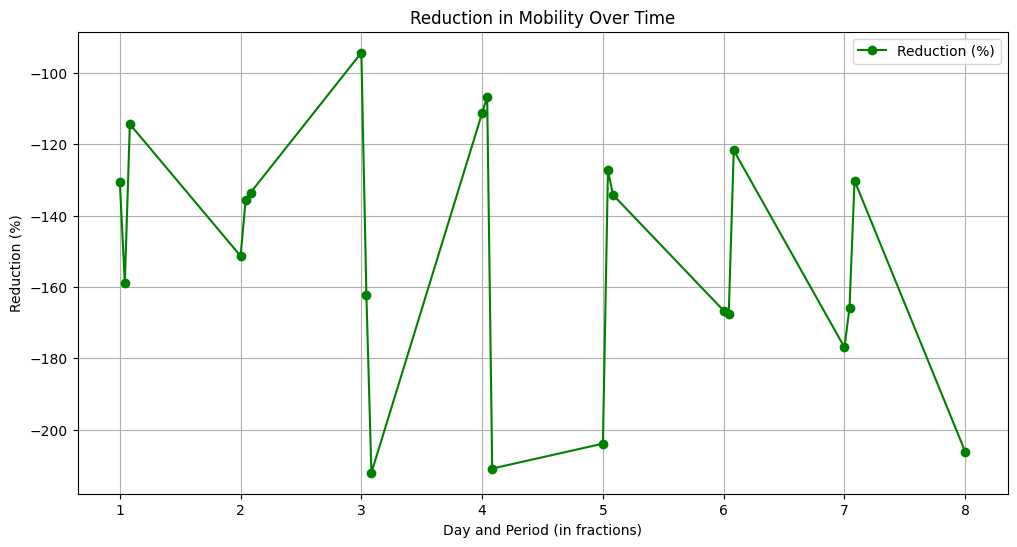

In [7]:
# Grouping data by Day and Period
time_analysis = combined_data.groupby(['Day', 'Period'])[['Baseline: People Moving', 'Crisis: People Moving']].sum().reset_index()

# Plot Baseline vs Crisis movements over time
plt.figure(figsize=(12, 6))
plt.plot(
    time_analysis['Day'] + time_analysis['Period'] / 24,
    time_analysis['Baseline: People Moving'],
    label='Baseline: People Moving',
    color='blue',
    marker='o'
)
plt.plot(
    time_analysis['Day'] + time_analysis['Period'] / 24,
    time_analysis['Crisis: People Moving'],
    label='Crisis: People Moving',
    color='red',
    marker='o'
)
plt.title('Mobility Trends Over Time')
plt.xlabel('Day and Period (in fractions)')
plt.ylabel('Number of People Moving')
plt.legend()
plt.grid(True)
plt.show()

# Plot Reduction Percentage Over Time
time_analysis['Reduction (%)'] = ((time_analysis['Baseline: People Moving'] - time_analysis['Crisis: People Moving']) /
                                   time_analysis['Baseline: People Moving']) * 100

plt.figure(figsize=(12, 6))
plt.plot(
    time_analysis['Day'] + time_analysis['Period'] / 24,
    time_analysis['Reduction (%)'],
    label='Reduction (%)',
    color='green',
    marker='o'
)
plt.title('Reduction in Mobility Over Time')
plt.xlabel('Day and Period (in fractions)')
plt.ylabel('Reduction (%)')
plt.grid(True)
plt.legend()
plt.show()


The first plot shows mobility trends over time: 
The number of people who moved during the crisis was higher compared to those during the baseline period. 
The third and fifth day recorded the highest number of movements during both periods.

The second plot shows the percentage reduction in mobility over time

 <h3>2. Current Map of Travel Reduction</h3>

To visualize the current map of travel reductions, I used a scatter plot and a heat map to represent the geographical movement reduction based on the coordinates and the difference between baseline and crisis movement.

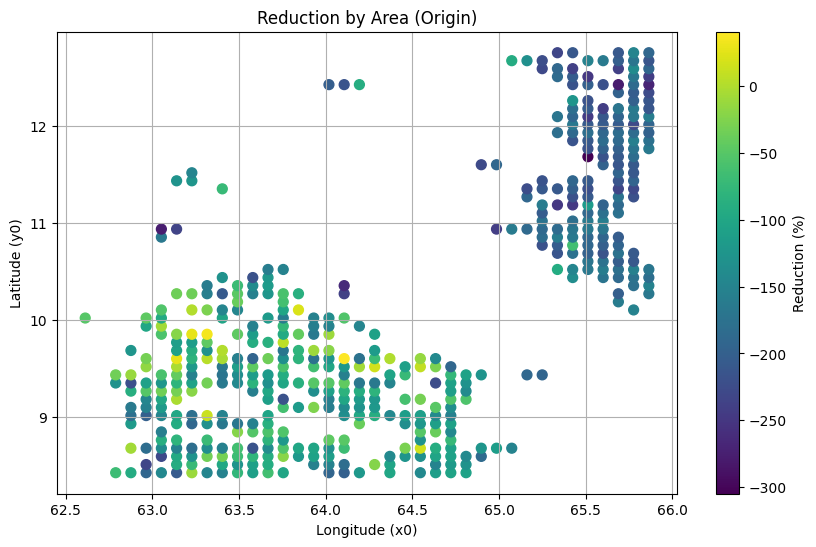

In [8]:
#QUESTION 2
# Aggregating reduction by area (origin coordinates)
area_reduction = combined_data.groupby(['x0', 'y0']).agg({
    'Reduction (%)': 'mean'
}).reset_index()

# Plot reduction per area
plt.figure(figsize=(10, 6))
plt.scatter(area_reduction['x0'], area_reduction['y0'], c=area_reduction['Reduction (%)'], cmap='viridis', s=50)
plt.colorbar(label='Reduction (%)')
plt.title('Reduction by Area (Origin)')
plt.xlabel('Longitude (x0)')
plt.ylabel('Latitude (y0)')
plt.grid(True)
plt.show()


Reduction% shows the relative decrease in movement for each route. The scatter plot shows the areas with high or low travel reduction

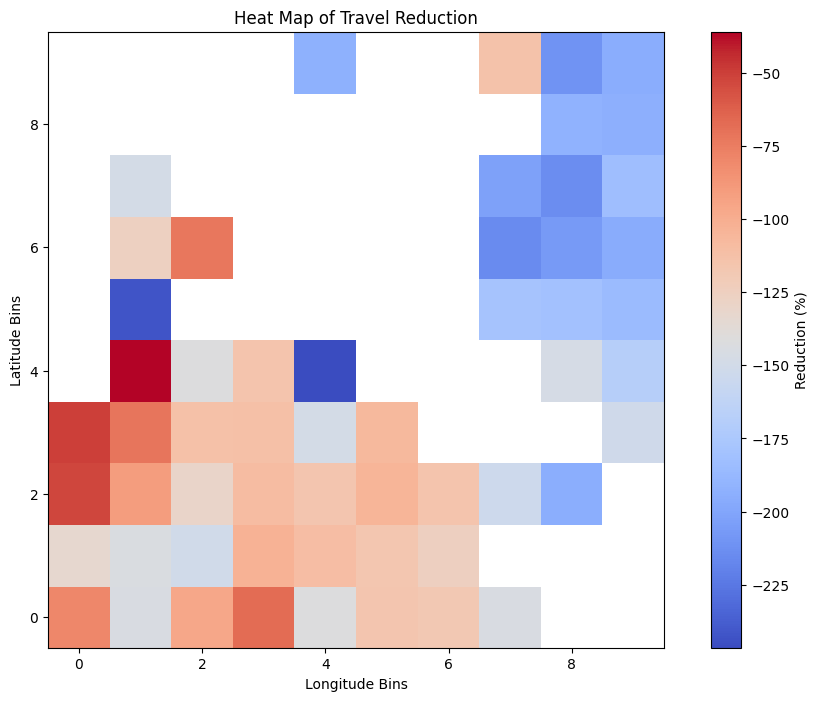

In [9]:
# Bin coordinates into geographical regions
bins = 10  # Number of bins for latitude and longitude
combined_data['x_bin'] = pd.cut(combined_data['x0'], bins=bins, labels=False)
combined_data['y_bin'] = pd.cut(combined_data['y0'], bins=bins, labels=False)

# Aggregate reduction by bins
heatmap_data = combined_data.groupby(['x_bin', 'y_bin'])['Reduction (%)'].mean().reset_index()

# Pivot for heat map
heatmap_pivot = heatmap_data.pivot(index='y_bin', columns='x_bin', values='Reduction (%)')

# Plot heat map
plt.figure(figsize=(12, 8))
plt.imshow(heatmap_pivot, cmap='coolwarm', origin='lower')
plt.colorbar(label='Reduction (%)')
plt.title('Heat Map of Travel Reduction')
plt.xlabel('Longitude Bins')
plt.ylabel('Latitude Bins')
plt.show()


The above heat map shows the high reduction points being concentrated between (0,0) and (3,4) while the low being concetrated around points(8,8). The highest point being (3,4) while the lowest being(3,5) & (4,4)
Areas with little or no reductions may indicate vulnerable areas or non-compliant with policies

 <h3>3. The Time Series Characteristics</h3>

To identify the characteristics in the time series of the mobility data. I analyzed the statistical properties(summary statistics) and trends in the baseline and crisis data over time(visuals).

In [10]:
#QUESTION 3
# Summary statistics
summary_stats = combined_data[['Baseline: People Moving', 'Crisis: People Moving']].describe()
print(summary_stats)


       Baseline: People Moving  Crisis: People Moving
count              5589.000000            5589.000000
mean                 28.077737              70.925568
std                  42.715678             108.478677
min                  10.000000              10.000000
25%                  12.000000              32.000000
50%                  16.666667              45.000000
75%                  27.000000              69.000000
max                 795.066667            2262.000000


"Crisis: People Moving" has a higher standard deviation which could indicate erratic mobility due to varying compliance levels.

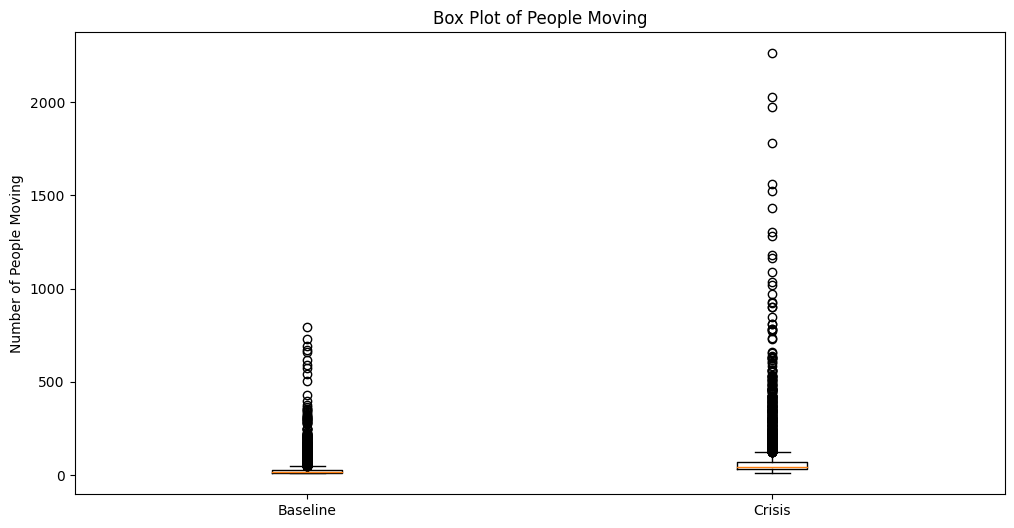

In [11]:
# Box plot for Baseline and Crisis data
plt.figure(figsize=(12, 6))
plt.boxplot([combined_data['Baseline: People Moving'], combined_data['Crisis: People Moving']], 
            labels=['Baseline', 'Crisis'])
plt.title('Box Plot of People Moving')
plt.ylabel('Number of People Moving')
plt.show()



In [12]:
# Create a list to hold day and time period information
time_periods = ['0000-0800', '0800-1600', '1600-0000']
days = [f'Day {i+1}' for i in range(7)]

# Add new column for 'Day and Time Period'
combined_data['Day and Time Period'] = ''

for day in range(1, 8):  # Days 1 to 7
    for period in range(3):  # Three time periods
        # Calculate the index in the combined_data DataFrame
        index = (day - 1) * 3 + period
        if index < len(combined_data):
            combined_data.at[index, 'Day and Time Period'] = f'{days[day - 1]} {time_periods[period]}'

# Display the modified DataFrame
print(combined_data[['Day and Time Period', 'Baseline: People Moving', 'Crisis: People Moving']])


     Day and Time Period  Baseline: People Moving  Crisis: People Moving
0        Day 1 0000-0800                14.666667                     35
1        Day 1 0800-1600                12.000000                     19
2        Day 1 1600-0000                10.333333                     20
3        Day 2 0000-0800                13.000000                     18
4        Day 2 0800-1600                11.000000                     11
...                  ...                      ...                    ...
5584                                    10.333333                     34
5585                                    11.000000                     32
5586                                    10.333333                     33
5587                                    14.666667                     39
5588                                    23.333333                     76

[5589 rows x 3 columns]


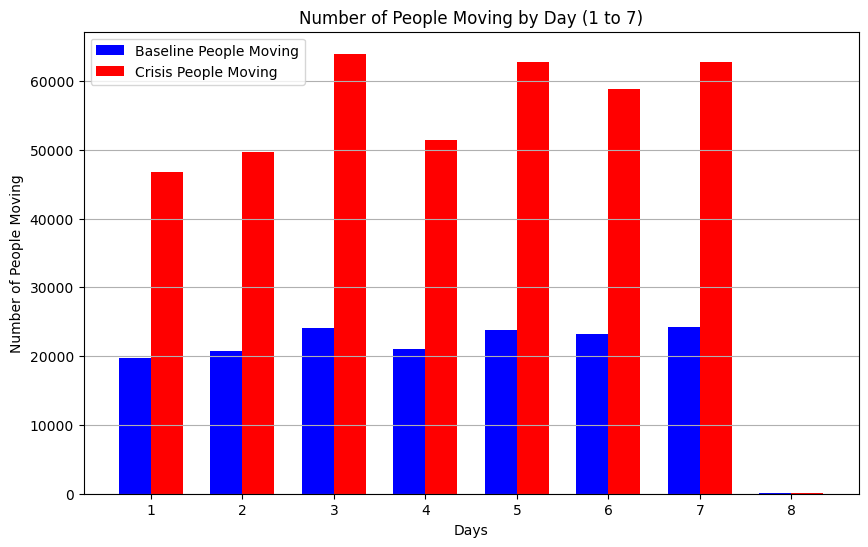

In [14]:
# Assuming 'combined_data' contains your aggregated data from all days
import numpy as np
# Create a new DataFrame to hold the total counts per day
daily_movement = combined_data.groupby('Day').agg({
    'Baseline: People Moving': 'sum',
    'Crisis: People Moving': 'sum'
}).reset_index()

# Plotting the data
plt.figure(figsize=(10, 6))

# Bar chart for baseline and crisis people moving by day
bar_width = 0.35
x = np.arange(len(daily_movement['Day']))

plt.bar(x - bar_width/2, daily_movement['Baseline: People Moving'], width=bar_width, label='Baseline People Moving', color='blue')
plt.bar(x + bar_width/2, daily_movement['Crisis: People Moving'], width=bar_width, label='Crisis People Moving', color='red')

# Adding titles and labels
plt.title('Number of People Moving by Day (1 to 7)')
plt.xlabel('Days')
plt.ylabel('Number of People Moving')
plt.xticks(x, daily_movement['Day'])  # Set the x-ticks to days
plt.legend()
plt.grid(axis='y')

plt.show()


 <h2>COMPARISON OF THE DIFFERENT AREAS IN THE DATA</h2>

To perform comparisons, mobility patterns need to be analyzed based on the geographical coordinates.

 <h3>1. Differences Between Points/Areas</h3>

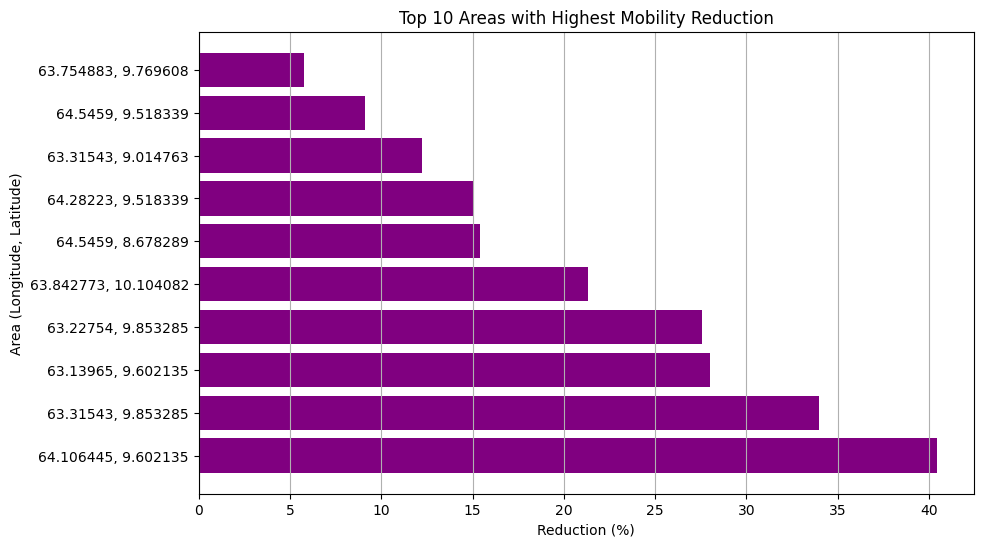

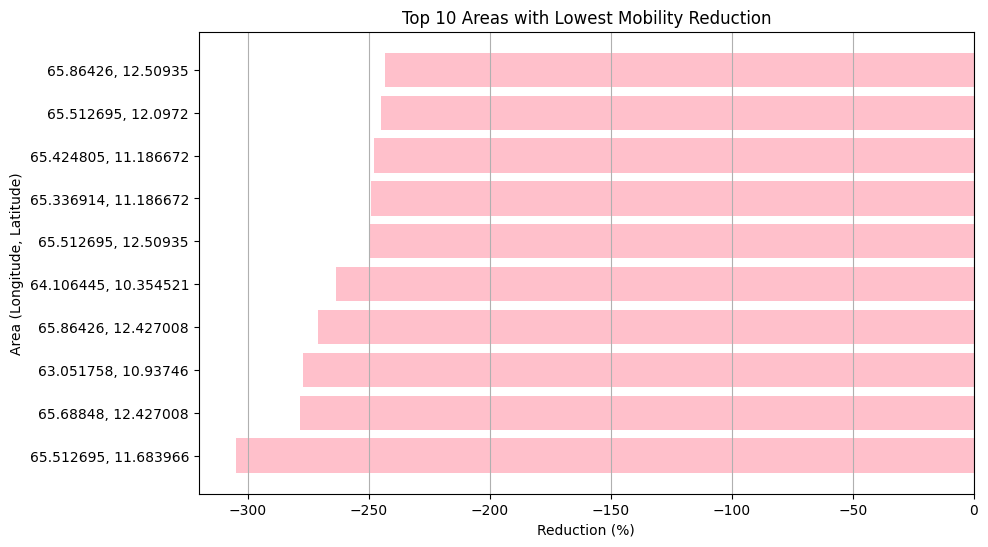

In [15]:
top_reducing_areas = area_reduction.nlargest(10, 'Reduction (%)')  # Top 10 reducing areas

plt.figure(figsize=(10, 6))

# Horizontal bar chart for reduction
plt.barh(top_reducing_areas['x0'].astype(str) + ', ' + top_reducing_areas['y0'].astype(str),
         top_reducing_areas['Reduction (%)'], color='purple')

plt.title('Top 10 Areas with Highest Mobility Reduction')
plt.xlabel('Reduction (%)')
plt.ylabel('Area (Longitude, Latitude)')
plt.grid(axis='x')
plt.show()


# Get the top 10 areas with the lowest mobility reduction
lowest_reducing_areas = area_reduction.nsmallest(10, 'Reduction (%)')  # Top 10 areas with lowest reduction

plt.figure(figsize=(10, 6))

# Horizontal bar chart for reduction
plt.barh(lowest_reducing_areas['x0'].astype(str) + ', ' + lowest_reducing_areas['y0'].astype(str),
         lowest_reducing_areas['Reduction (%)'], color='pink')

plt.title('Top 10 Areas with Lowest Mobility Reduction')
plt.xlabel('Reduction (%)')
plt.ylabel('Area (Longitude, Latitude)')
plt.grid(axis='x')
plt.show()




From the bar chart above, we can tell the grouped areas with the highest mobility reduction and those with the lowest mobility reduction. This helps us to highlight the vulnerable areas that did not effectively reduce mobility.

In [16]:
# Group by origin coordinates (x0, y0) and aggregate mobility data
area_comparison = combined_data.groupby(['x0', 'y0']).agg({
    'Baseline: People Moving': 'sum',
    'Crisis: People Moving': 'sum',
}).reset_index()

# Calculate the percentage reduction for each area
area_comparison['Reduction (%)'] = (
    (area_comparison['Baseline: People Moving'] - area_comparison['Crisis: People Moving']) /
    area_comparison['Baseline: People Moving'] * 100
)


 <h3>2. Cluster Areas</h3>

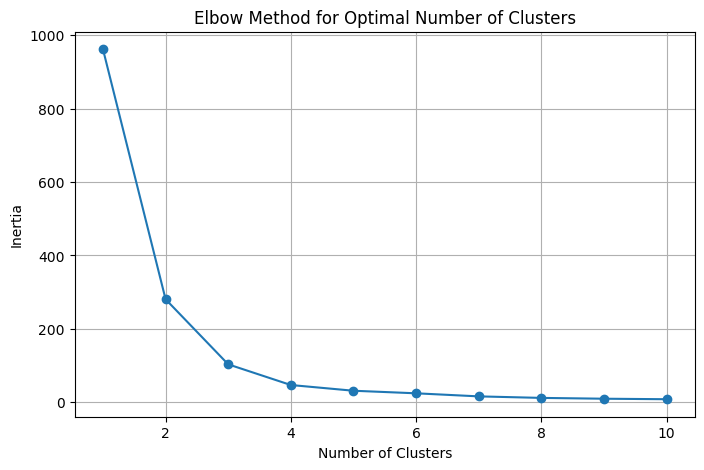

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Standardize the data
scaler = StandardScaler()
area_comparison_scaled = scaler.fit_transform(area_comparison[['Baseline: People Moving', 'Crisis: People Moving']])

# Determine the optimal number of clusters using the elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(area_comparison_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


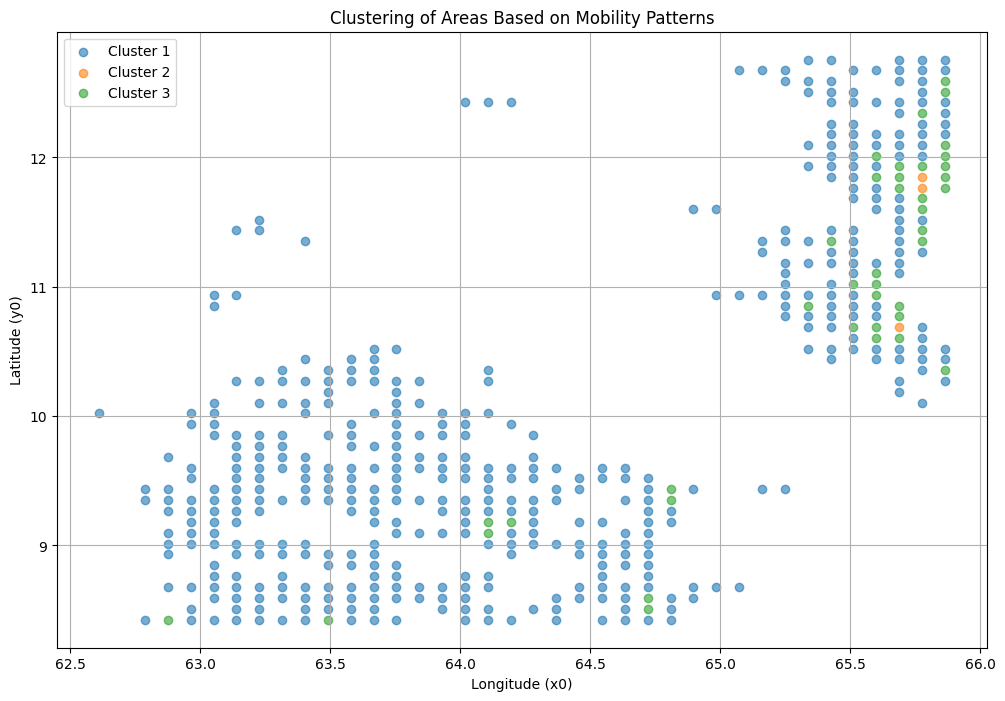

In [18]:
# K-Means clustering with an optimal number of clusters (e.g., 3)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
area_comparison['Cluster'] = kmeans.fit_predict(area_comparison_scaled)

# Plot the clustered areas
plt.figure(figsize=(12, 8))
for cluster in range(optimal_clusters):
    cluster_data = area_comparison[area_comparison['Cluster'] == cluster]
    plt.scatter(cluster_data['x0'], cluster_data['y0'], label=f'Cluster {cluster + 1}', alpha=0.6)

plt.title('Clustering of Areas Based on Mobility Patterns')
plt.xlabel('Longitude (x0)')
plt.ylabel('Latitude (y0)')
plt.legend()
plt.grid(True)
plt.show()


Areas with similar reduction% group together. High-compliance areas also share a characteristic such as less popultion or stricter enforcements.

 <h3>3. Vulnerable Areas</h3>

In [19]:
# Find vulnerable areas (bottom 10% reduction)
vulnerable_areas = area_reduction.nsmallest(10, 'Reduction (%)')
print(vulnerable_areas)


            x0         y0  Reduction (%)
381  65.512695  11.683966    -304.881920
435  65.688480  12.427008    -278.445748
41   63.051758  10.937460    -276.942971
476  65.864260  12.427008    -270.871453
231  64.106445  10.354521    -263.636364
390  65.512695  12.509350    -249.501466
341  65.336914  11.186672    -248.790323
355  65.424805  11.186672    -247.605083
386  65.512695  12.097200    -244.897121
477  65.864260  12.509350    -243.239708


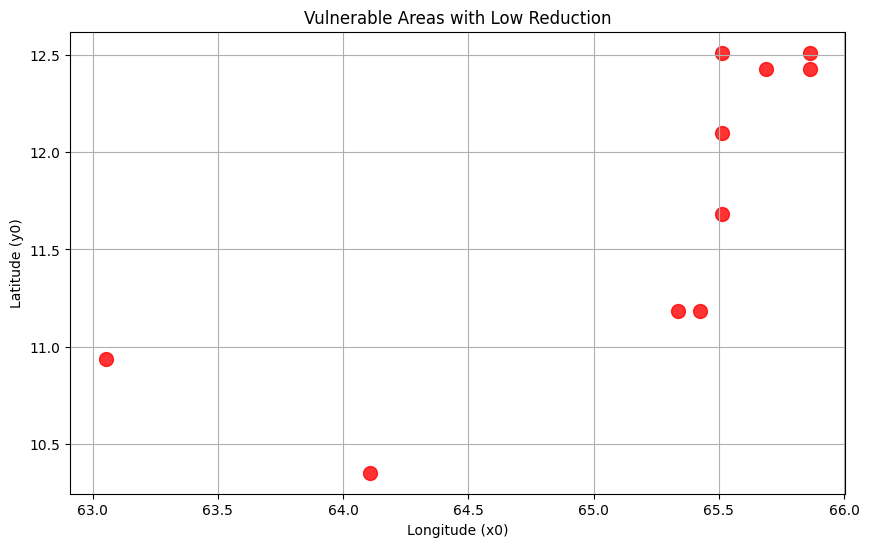

In [20]:
# Scatter plot for vulnerable areas
plt.figure(figsize=(10, 6))
plt.scatter(vulnerable_areas['x0'], vulnerable_areas['y0'], c='red', s=100, alpha=0.8)

plt.title('Vulnerable Areas with Low Reduction')
plt.xlabel('Longitude (x0)')
plt.ylabel('Latitude (y0)')
plt.grid(True)
plt.show()


Some areas show low reduction which could indicate enforcement challenges. These areas might indicate populated zones.

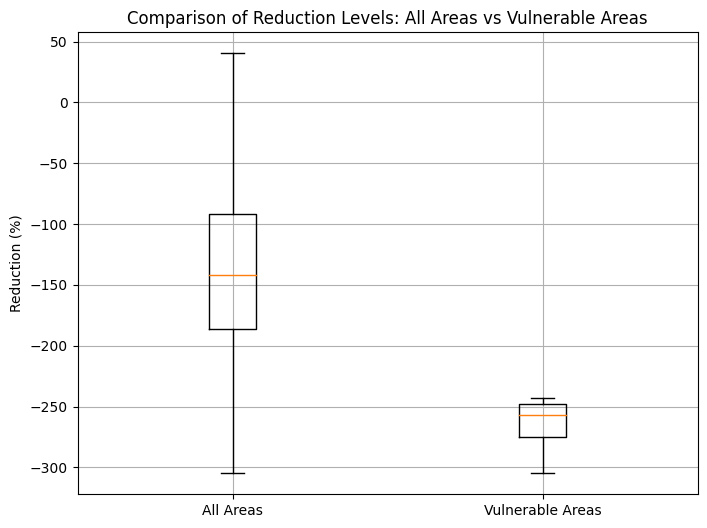

In [21]:
# Example: Box plot for reduction comparison
plt.figure(figsize=(8, 6))
plt.boxplot([area_reduction['Reduction (%)'], vulnerable_areas['Reduction (%)']], labels=['All Areas', 'Vulnerable Areas'])

plt.title('Comparison of Reduction Levels: All Areas vs Vulnerable Areas')
plt.ylabel('Reduction (%)')
plt.grid(True)
plt.show()


Vulnerable areas have low reduction percentages. These might require targeted interventions such as stricter enforcements or other mobility options

<h2>Summary and Insights<h2>

Using aggregated mobility data, this research sought to examine the effects of measures that reduced mobility and promoted social separation during the COVID-19 epidemic. Finding sensitive locations that did not substantially impair movement and comprehending how mobility patterns evolved over time were the main goals of the investigation.

<h3>Important Results:<h3>

Overview of Mobility Shifts:

The overall decrease in mobility showed that social distancing measures were being followed, though to differing degrees in different places.
During peak movement periods, when constraints were probably less effective, the study showed clear trends in mobility across the day.

Present Travel Reduction Map:

The regional distribution of mobility reductions was depicted through visualisations that distinguished between regions with substantial compliance and those with negligible reductions.
A better understanding of regional behaviours throughout the crisis was made possible by mapping the changes in movement.

Features of Time Series:

Over the course of the observed week, the time series analysis revealed variations in mobility, which suggested reactions to governmental actions and shifts in public behaviour.
Certain findings indicated that the first 2 days of the week mobility might differ the rest of the days' mobility.

Comparing the Areas:
    
Vulnerable zones with minimal mobility reduction were identified by the research as sites that would be more susceptible to virus transmission because of ongoing movement.
A visual comparison of compliant and susceptible locations was made possible by the horizontal bar charts for the top ten areas with the largest and lowest mobility reductions.


<h3>Insights for further analysis:<h3>

Group Analysis:

By using clustering approaches, planners may be able to gain a better understanding of the similar mobility behaviours across different places.

Longitudinal Studies:

Additional research conducted over longer time frames may be able to monitor the efficacy of policies over time and evaluate recovery patterns as limitations are removed.

Impact of External Factors:

Investigating how external events—such as regional outbreaks or public health campaigns—affect migration patterns may help to clarify current knowledge and enhance subsequent reactions.

<h3>Conclusion:<h3>

<h4>
The significance of mobility data in assessing the efficacy of public health measures in times of crisis was emphasised by this evaluation.
Stakeholders can create more focused initiatives to protect public health in future situations by identifying risk locations and comprehending migration trends.
<h4>